<center>
<img src="https://habrastorage.org/web/677/8e1/337/6778e1337c3d4b159d7e99df94227cb2.jpg"/>
## Специализация "Машинное обучение и анализ данных"
<center>Автор материала: программист-исследователь Mail.Ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ [Юрий Кашницкий](https://yorko.github.io/)

# <center> Capstone проект №1 <br> Идентификация пользователей по посещенным веб-страницам
<img src='http://i.istockimg.com/file_thumbview_approve/21546327/5/stock-illustration-21546327-identification-de-l-utilisateur.jpg'>

# <center>Неделя 5.  Соревнование Kaggle "Catch Me If You Can"

На этой неделе мы вспомним про концепцию стохастического градиентного спуска и опробуем классификатор Scikit-learn SGDClassifier, который работает намного быстрее на больших выборках, чем алгоритмы, которые мы тестировали на 4 неделе. Также мы познакомимся с данными [соревнования](https://inclass.kaggle.com/c/catch-me-if-you-can-intruder-detection-through-webpage-session-tracking2) Kaggle по идентификации пользователей и сделаем в нем первые посылки. По итогам этой недели дополнительные баллы получат те, кто попадет в топ-30 публичного лидерборда соревнования.

**В этой части проекта Вам могут быть полезны видеозаписи следующих лекций курса "Обучение на размеченных данных":**
   - [Стохатический градиентный спуск](https://www.coursera.org/learn/supervised-learning/lecture/xRY50/stokhastichieskii-ghradiientnyi-spusk)
   - [Линейные модели. Sklearn.linear_model. Классификация](https://www.coursera.org/learn/supervised-learning/lecture/EBg9t/linieinyie-modieli-sklearn-linear-model-klassifikatsiia)
   
**Также рекомендуется вернуться и просмотреть [задание](https://www.coursera.org/learn/supervised-learning/programming/t2Idc/linieinaia-rieghriessiia-i-stokhastichieskii-ghradiientnyi-spusk) "Линейная регрессия и стохастический градиентный спуск" 1 недели 2 курса специализации.**

### Задание
1. Заполните код в этой тетрадке 
2. Если вы проходите специализацию Яндеса и МФТИ, пошлите тетрадку в соответствующем Peer Review. <br> Если вы проходите курс ODS, выберите ответы в [веб-форме](https://docs.google.com/forms/d/1pLsegkAICL9PzOLyAeH9DmDOBfktte0l8JW75uWcTng). 

In [1]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
import os
import pickle
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix, hstack,coo_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score


**Считаем данные [соревнования](https://inclass.kaggle.com/c/catch-me-if-you-can-intruder-detection-through-webpage-session-tracking2) в DataFrame train_df и test_df (обучающая и тестовая выборки).**

In [2]:
# Поменяйте на свой путь к данным
PATH_TO_DATA = 'C:/Users/Anna/Downloads/C6_UserID/capstone_user_identification'

In [3]:
train_df = pd.read_csv(os.path.join(PATH_TO_DATA, 'train_sessions.csv'),
                       index_col='session_id')
test_df = pd.read_csv(os.path.join(PATH_TO_DATA, 'test_sessions.csv'),
                      index_col='session_id')

In [111]:
train_df.head()

,site1,time1,site2,time2,site3,time3,site4,time4,site5,time5,...,time6,site7,time7,site8,time8,site9,time9,site10,time10,target
session_id,,,,,,,,,,,,,,,,,,,,,
1,718,2014-02-20 10:02:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,890,2014-02-22 11:19:50,941.0,2014-02-22 11:19:50,3847.0,2014-02-22 11:19:51,941.0,2014-02-22 11:19:51,942.0,2014-02-22 11:19:51,...,2014-02-22 11:19:51,3847.0,2014-02-22 11:19:52,3846.0,2014-02-22 11:19:52,1516.0,2014-02-22 11:20:15,1518.0,2014-02-22 11:20:16,0
3,14769,2013-12-16 16:40:17,39.0,2013-12-16 16:40:18,14768.0,2013-12-16 16:40:19,14769.0,2013-12-16 16:40:19,37.0,2013-12-16 16:40:19,...,2013-12-16 16:40:19,14768.0,2013-12-16 16:40:20,14768.0,2013-12-16 16:40:21,14768.0,2013-12-16 16:40:22,14768.0,2013-12-16 16:40:24,0
4,782,2014-03-28 10:52:12,782.0,2014-03-28 10:52:42,782.0,2014-03-28 10:53:12,782.0,2014-03-28 10:53:42,782.0,2014-03-28 10:54:12,...,2014-03-28 10:54:42,782.0,2014-03-28 10:55:12,782.0,2014-03-28 10:55:42,782.0,2014-03-28 10:56:12,782.0,2014-03-28 10:56:42,0
5,22,2014-02-28 10:53:05,177.0,2014-02-28 10:55:22,175.0,2014-02-28 10:55:22,178.0,2014-02-28 10:55:23,177.0,2014-02-28 10:55:23,...,2014-02-28 10:55:59,175.0,2014-02-28 10:55:59,177.0,2014-02-28 10:55:59,177.0,2014-02-28 10:57:06,178.0,2014-02-28 10:57:11,0


**Объединим обучающую и тестовую выборки – это понадобится, чтоб вместе потом привести их к разреженному формату.**

In [4]:
train_test_df = pd.concat([train_df, test_df])

В обучающей выборке видим следующие признаки:
    - site1 – индекс первого посещенного сайта в сессии
    - time1 – время посещения первого сайта в сессии
    - ...
    - site10 – индекс 10-го посещенного сайта в сессии
    - time10 – время посещения 10-го сайта в сессии
    - user_id – ID пользователя
    
Сессии пользователей выделены таким образом, что они не могут быть длинее получаса или 10 сайтов. То есть сессия считается оконченной либо когда пользователь посетил 10 сайтов подряд, либо когда сессия заняла по времени более 30 минут. 

**Посмотрим на статистику признаков.**

Пропуски возникают там, где сессии короткие (менее 10 сайтов). Скажем, если человек 1 января 2015 года посетил *vk.com* в 20:01, потом *yandex.ru* в 20:29, затем *google.com* в 20:33, то первая его сессия будет состоять только из двух сайтов (site1 – ID сайта *vk.com*, time1 – 2015-01-01 20:01:00, site2 – ID сайта  *yandex.ru*, time2 – 2015-01-01 20:29:00, остальные признаки – NaN), а начиная с *google.com* пойдет новая сессия, потому что уже прошло более 30 минут с момента посещения *vk.com*.

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 253561 entries, 1 to 253561
Data columns (total 21 columns):
site1     253561 non-null int64
time1     253561 non-null object
site2     250098 non-null float64
time2     250098 non-null object
site3     246919 non-null float64
time3     246919 non-null object
site4     244321 non-null float64
time4     244321 non-null object
site5     241829 non-null float64
time5     241829 non-null object
site6     239495 non-null float64
time6     239495 non-null object
site7     237297 non-null float64
time7     237297 non-null object
site8     235224 non-null float64
time8     235224 non-null object
site9     233084 non-null float64
time9     233084 non-null object
site10    231052 non-null float64
time10    231052 non-null object
target    253561 non-null int64
dtypes: float64(9), int64(2), object(10)
memory usage: 42.6+ MB


In [10]:
test_df.head()

,site1,time1,site2,time2,site3,time3,site4,time4,site5,time5,site6,time6,site7,time7,site8,time8,site9,time9,site10,time10
session_id,,,,,,,,,,,,,,,,,,,,
1,29,2014-10-04 11:19:53,35.0,2014-10-04 11:19:53,22.0,2014-10-04 11:19:54,321.0,2014-10-04 11:19:54,23.0,2014-10-04 11:19:54,2211.0,2014-10-04 11:19:54,6730.0,2014-10-04 11:19:54,21.0,2014-10-04 11:19:54,44582.0,2014-10-04 11:20:00,15336.0,2014-10-04 11:20:00
2,782,2014-07-03 11:00:28,782.0,2014-07-03 11:00:53,782.0,2014-07-03 11:00:58,782.0,2014-07-03 11:01:06,782.0,2014-07-03 11:01:09,782.0,2014-07-03 11:01:10,782.0,2014-07-03 11:01:23,782.0,2014-07-03 11:01:29,782.0,2014-07-03 11:01:30,782.0,2014-07-03 11:01:53
3,55,2014-12-05 15:55:12,55.0,2014-12-05 15:55:13,55.0,2014-12-05 15:55:14,55.0,2014-12-05 15:56:15,55.0,2014-12-05 15:56:16,55.0,2014-12-05 15:56:17,55.0,2014-12-05 15:56:18,55.0,2014-12-05 15:56:19,1445.0,2014-12-05 15:56:33,1445.0,2014-12-05 15:56:36
4,1023,2014-11-04 10:03:19,1022.0,2014-11-04 10:03:19,50.0,2014-11-04 10:03:20,222.0,2014-11-04 10:03:21,202.0,2014-11-04 10:03:21,3374.0,2014-11-04 10:03:22,50.0,2014-11-04 10:03:22,48.0,2014-11-04 10:03:22,48.0,2014-11-04 10:03:23,3374.0,2014-11-04 10:03:23
5,301,2014-05-16 15:05:31,301.0,2014-05-16 15:05:32,301.0,2014-05-16 15:05:33,66.0,2014-05-16 15:05:39,67.0,2014-05-16 15:05:40,69.0,2014-05-16 15:05:40,70.0,2014-05-16 15:05:40,68.0,2014-05-16 15:05:40,71.0,2014-05-16 15:05:40,167.0,2014-05-16 15:05:44


In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82797 entries, 1 to 82797
Data columns (total 20 columns):
site1     82797 non-null int64
time1     82797 non-null object
site2     81308 non-null float64
time2     81308 non-null object
site3     80075 non-null float64
time3     80075 non-null object
site4     79182 non-null float64
time4     79182 non-null object
site5     78341 non-null float64
time5     78341 non-null object
site6     77566 non-null float64
time6     77566 non-null object
site7     76840 non-null float64
time7     76840 non-null object
site8     76151 non-null float64
time8     76151 non-null object
site9     75484 non-null float64
time9     75484 non-null object
site10    74806 non-null float64
time10    74806 non-null object
dtypes: float64(9), int64(1), object(10)
memory usage: 13.3+ MB


**В обучающей выборке – 2297 сессий одного пользователя (Alice) и 251264 сессий – других пользователей, не Элис. Дисбаланс классов очень сильный, и смотреть на долю верных ответов (accuracy) непоказательно.**

In [113]:
train_df['target'].value_counts()

0    251264
1      2297
Name: target, dtype: int64

**Пока для прогноза будем использовать только индексы посещенных сайтов. Индексы нумеровались с 1, так что заменим пропуски на нули.**

In [5]:
train_test_df_sites = train_test_df[['site%d' % i for i in range(1, 11)]].fillna(0).astype('int')

In [6]:
train_test_df_sites.head(10)

,site1,site2,site3,site4,site5,site6,site7,site8,site9,site10
session_id,,,,,,,,,,
1,718,0,0,0,0,0,0,0,0,0
2,890,941,3847,941,942,3846,3847,3846,1516,1518
3,14769,39,14768,14769,37,39,14768,14768,14768,14768
4,782,782,782,782,782,782,782,782,782,782
5,22,177,175,178,177,178,175,177,177,178
6,570,21,570,21,21,0,0,0,0,0
7,803,23,5956,17513,37,21,803,17514,17514,17514
8,22,21,29,5041,14422,23,21,5041,14421,14421
9,668,940,942,941,941,942,940,23,21,22


**Создайте разреженные матрицы *X_train_sparse* и *X_test_sparse* аналогично тому, как мы это делали ранее. Используйте объединенную матрицу *train_test_df_sites*, потом разделите обратно на обучающую и тестовую части.**

Обратите внимание на то, что в  сессиях меньше 10 сайтов  у нас остались нули, так что первый признак (сколько раз попался 0) по смыслу отличен от остальных (сколько раз попался сайт с индексом $i$). Поэтому первый столбец разреженной матрицы надо будет удалить.

**Выделите в отдельный вектор *y* ответы на обучающей выборке.**

In [7]:
def csr(matrix):
    pointer = [0]
    ind = []
    val = []
    for m in range(0,matrix.shape [0]):
        result = {i: list(matrix[m]).count(i) for i in list(matrix[m])}
        ind.extend(result.keys())
        val.extend(result.values())
        pointer.append(pointer[-1] + len(result))
    return csr_matrix( (val, ind, pointer)  ) [:, 1:]

In [8]:
train_test_sparse = csr(train_test_df_sites.values)

In [9]:
X_train_sparse = train_test_sparse[:train_df.shape[0], :]
X_test_sparse = train_test_sparse[train_df.shape[0]:, :]
y = train_df.iloc[:,-1].values

In [10]:
X_test_sparse.shape

(82797, 48371)

In [119]:
X_train_sparse.shape

(253561, 48371)

In [15]:
train_test_sparse.shape

(336358, 48371)

**<font color='red'>Вопрос 1. </font> Выведите размерности матриц *X_train_sparse* и *X_test_sparse* – 4 числа на одной строке через пробел: число строк и столбцов матрицы *X_train_sparse*, затем число строк и столбцов матрицы *X_test_sparse*.**

In [ ]:
253561 48371 82797 48371

**Сохраним в pickle-файлы объекты *X_train_sparse*, *X_test_sparse* и *y* (последний – в файл *kaggle_data/train_target.pkl*).**

In [26]:
with open(os.path.join(PATH_TO_DATA, 'X_train_sparse.pkl'), 'wb') as X_train_sparse_pkl:
    pickle.dump(X_train_sparse, X_train_sparse_pkl, protocol=2)
with open(os.path.join(PATH_TO_DATA, 'X_test_sparse.pkl'), 'wb') as X_test_sparse_pkl:
    pickle.dump(X_test_sparse, X_test_sparse_pkl, protocol=2)
with open(os.path.join(PATH_TO_DATA, 'train_target.pkl'), 'wb') as train_target_pkl:
    pickle.dump(y, train_target_pkl, protocol=2)

**Разобьем обучающую выборку на 2 части в пропорции 7/3, причем не перемешивая. Исходные данные упорядочены по времени, тестовая выборка по времени четко отделена от обучающей, это же соблюдем и здесь.**

In [11]:
train_share = int(.7 * X_train_sparse.shape[0])
X_train, y_train = X_train_sparse[:train_share, :], y[:train_share]
X_valid, y_valid  = X_train_sparse[train_share:, :], y[train_share:]

**Создайте объект `sklearn.linear_model.SGDClassifier` с логистической функцией потерь и параметром *random_state*=17. Остальные параметры оставьте по умолчанию, разве что *n_jobs*=-1 никогда не помешает. Обучите  модель на выборке `(X_train, y_train)`.**

In [17]:
sgd_logit = SGDClassifier(loss = 'log', n_jobs = -1, random_state =17)
sgd_logit.fit(X_train,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=-1, penalty='l2',
       power_t=0.5, random_state=17, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

**Сделайте прогноз в виде предсказанных вероятностей того, что это сессия Элис, на отложенной выборке *(X_valid, y_valid)*.**

In [18]:
logit_valid_pred_proba = sgd_logit.predict_proba(X_valid) [:, 1]

**<font color='red'>Вопрос 2. </font> Посчитайте ROC AUC логистической регрессии, обученной с помощью стохастического градиентного спуска, на отложенной выборке. Округлите до 3 знаков после разделителя.**

In [19]:
round(roc_auc_score( y_valid, logit_valid_pred_proba),3)

0.934

**Сделайте прогноз в виде предсказанных вероятностей отнесения к классу 1 для тестовой выборки с помощью той же *sgd_logit*, обученной уже на всей обучающей выборке (а не на 70%).**

In [20]:
%%time
sgd_logit.fit(X_train_sparse,y)
logit_test_pred_proba =  sgd_logit.predict_proba(X_test_sparse)

Wall time: 384 ms


In [144]:
logit_test_pred_proba

array([[9.89194382e-01, 1.08056178e-02],
       [9.99942911e-01, 5.70890925e-05],
       [9.99982997e-01, 1.70031681e-05],
       ...,
       [9.88517536e-01, 1.14824638e-02],
       [9.95762433e-01, 4.23756658e-03],
       [9.98977278e-01, 1.02272160e-03]])

In [146]:
predicted_labels0 =  logit_test_pred_proba[:,1]


**Запишите ответы в файл и сделайте посылку на Kaggle. Дайте своей команде (из одного человека) на Kaggle говорящее название – по шаблону "[YDF & MIPT] Coursera_Username", чтоб можно было легко идентифицировать Вашу посылку на [лидерборде](https://inclass.kaggle.com/c/catch-me-if-you-can-intruder-detection-through-webpage-session-tracking2/leaderboard/public).**

**Результат, который мы только что получили, соответствует бейзлайну "SGDCLassifer" на лидерборде, задача на эту неделю – как минимум его побить.**

In [12]:
def write_to_submission_file(predicted_labels, out_file,
                             target='target', index_label="session_id"):
    # turn predictions into data frame and save as csv file
    predicted_df = pd.DataFrame(predicted_labels,
                                index = np.arange(1, predicted_labels.shape[0] + 1),
                                columns=[target])
    predicted_df.to_csv(out_file, index_label=index_label)

Получаем baseline.

In [148]:
write_to_submission_file(np.array(predicted_labels0), 'submission0.csv') #kaggle: 0.91273 "нулевой результат", baseline

## Критерии оценки работы (только для Peer Review в специализации):
- Правильные ли получились размерности матриц в п. 1? (max. 2 балла)
- Правильным ли получилось значения ROC AUC в п. 2? (max. 4 балла)
- Побит ли бенчмарк "sgd_logit_benchmark.csv" на публичной части рейтинга в соревновании Kaggle? (max. 2 балла)
- Побит ли бенчмарк "Logit +3 features" на публичной части рейтинга в соревновании Kaggle? (max. 2 балла)

## Пути улучшения
На этой неделе дается много времени на соревнование. Не забывайте вносить хорошие идеи, к которым Вы пришли по ходу соревнования, в описание финального проекта (`html`, `pdf` или `ipynb`). Это только в случае, если вы проходите специализацию.
Что можно попробовать:
 - Использовать ранее построенные признаки для улучшения модели (проверить их можно на меньшей выборке по 150 пользователям, отделив одного из пользователей от остальных – это быстрее)
 - Настроить параметры моделей (например, коэффициенты регуляризации)
 - Если позволяют мощности (или хватает терпения), можно попробовать смешивание (блендинг) ответов бустинга и линейной модели. [Вот](http://mlwave.com/kaggle-ensembling-guide/) один из самых известных тьюториалов по смешиванию ответов алгоритмов, также хороша [статья](https://alexanderdyakonov.wordpress.com/2017/03/10/cтекинг-stacking-и-блендинг-blending) Александра Дьяконова
 - Обратите внимание, что в соревновании также даны исходные данные о посещенных веб-страницах Элис и остальными 1557 пользователями (*train.zip*). По этим данным можно сформировать свою обучающую выборку. 

На 6 неделе мы пройдем большой тьюториал по Vowpal Wabbit и попробуем его в деле, на данных соревнования.

Дальше пытаемся улучшить baseline.
Сначала настраиваем параметры SGDClassifier:

In [13]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV

In [18]:
sgd_params1 = {'alpha': np.linspace(3.2e-5, 4.3e-5, 12)}
cv_search = StratifiedKFold(n_splits=3, shuffle=True, random_state=17)

In [24]:
sgd_grid_searcher1 = GridSearchCV(sgd_logit, sgd_params1, scoring = 'roc_auc', cv = cv_search)
sgd_grid_searcher1.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=17, shuffle=True),
       error_score='raise-deprecating',
       estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=-1, penalty='l2',
       power_t=0.5, random_state=17, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': array([3.2e-05, 3.3e-05, 3.4e-05, 3.5e-05, 3.6e-05, 3.7e-05, 3.8e-05,
       3.9e-05, 4.0e-05, 4.1e-05, 4.2e-05, 4.3e-05])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [183]:
sgd_grid_searcher1.best_estimator_

SGDClassifier(alpha=3.4e-05, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=-1, penalty='l2',
       power_t=0.5, random_state=17, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [25]:
sgd_grid_searcher1.best_score_

0.9485014247412142

In [26]:
round(roc_auc_score( y_valid, sgd_grid_searcher1.best_estimator_.predict_proba(X_valid) [:, 1]),3)

0.947

In [27]:
sgd_grid_searcher1.best_estimator_.fit(X_train_sparse,y)
sgd1_test_pred_proba =  sgd_grid_searcher1.best_estimator_.predict_proba(X_test_sparse)

In [265]:
write_to_submission_file(sgd1_test_pred_proba [:,1], 'submission2.csv')#kaggle - 0.91219 - чуть хуже, чем baseline

Результат отрицательный. Пробуем другие классификаторы - Логистическую регрессию  и Наивного Байеса.

In [16]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.naive_bayes import MultinomialNB

In [125]:
nb = MultinomialNB()

In [126]:
nb_params1 = {'alpha': np.linspace(0.00005, 0.00015, 12)}

nb_grid_searcher1 = GridSearchCV(nb, nb_params1, scoring = 'roc_auc', cv = cv_search)
nb_grid_searcher1.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=17, shuffle=True),
       error_score='raise-deprecating',
       estimator=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': array([5.00000e-05, 5.90909e-05, 6.81818e-05, 7.72727e-05, 8.63636e-05,
       9.54545e-05, 1.04545e-04, 1.13636e-04, 1.22727e-04, 1.31818e-04,
       1.40909e-04, 1.50000e-04])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [127]:
nb_grid_searcher1.best_estimator_

MultinomialNB(alpha=0.00010454545454545455, class_prior=None, fit_prior=True)

In [272]:
nb_grid_searcher1.best_score_

0.9497661864358643

In [273]:
round(roc_auc_score( y_valid, nb_grid_searcher1.best_estimator_.predict_proba(X_valid) [:, 1]),3)

0.954

In [274]:
nb_grid_searcher1.best_estimator_.fit(X_train_sparse,y)
nb1_test_pred_proba =  nb_grid_searcher1.best_estimator_.predict_proba(X_test_sparse)

In [275]:
write_to_submission_file(nb1_test_pred_proba [:,1], 'submission3.csv') #kaggle - 0.878 -хуже, чем нулевой результат

In [14]:
from operator import itemgetter

In [19]:
%%time
logit_c_values1 = np.linspace(1.1, 1.7, 7)

logit_grid_searcher1 = LogisticRegressionCV(logit_c_values1, multi_class='ovr' ,scoring = 'roc_auc', class_weight = 'balanced',cv = cv_search, n_jobs=-1, random_state=17 )
logit_grid_searcher1.fit(X_train, y_train)

Wall time: 30.3 s


In [31]:

sorted(list(zip(logit_grid_searcher1.Cs_,np.mean(logit_grid_searcher1.scores_[1], axis = 0))), key = itemgetter(1)) [::-1] 

[(1.1, 0.9538138733827034),
 (1.3, 0.9524321345018194),
 (1.2000000000000002, 0.9523992969360267),
 (1.4, 0.952056925461223),
 (1.5, 0.9520336947431574),
 (1.6, 0.9518139806095768),
 (1.7, 0.9516904518507502)]

In [32]:
logit1_clf = LogisticRegression(C=1.1, multi_class='ovr' , n_jobs=-1, random_state=17, class_weight = 'balanced')
logit1_clf.fit(X_train, y_train)

LogisticRegression(C=1.1, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=-1, penalty='l2', random_state=17,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [33]:
logit1_valid_pred_proba = logit1_clf.predict_proba(X_valid) [:, 1]

In [34]:
round(roc_auc_score( y_valid, logit1_valid_pred_proba),3)

0.957

In [229]:
%%time
logit1_clf.fit(X_train_sparse,y)
logit1_test_pred_proba =  logit1_clf.predict_proba(X_test_sparse)

Wall time: 6.57 s


In [231]:
write_to_submission_file(logit1_test_pred_proba [:,1], 'submission1.csv') #kaggle - 0.906- хуже, чем baseline

In [278]:
logit2_clf = LogisticRegression(C=1, multi_class='ovr' , n_jobs=-1, random_state=17)
logit2_clf.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=17, solver='warn', tol=0.0001,
          verbose=0, warm_start=False)

In [279]:
write_to_submission_file(logit2_clf.predict_proba (X_test_sparse) [:,1], 'submission5.csv') #kaggle - 0.906 -хуже, чем baseline

Итак, работаем с baseline- классификатором.
Пробуем таки добавить признаки time_diff.

In [20]:
#Создадим таблицу данных о времени посещения сайтов
train_test_df_times = train_test_df[['time%d' % i for i in range(1, 11)]].apply(pd.to_datetime).fillna(0)

In [25]:
#Сделаем матрицу time_diffs, куда запишем время посещения сайтов
train_test_df_times_raw = train_test_df[['time%d' % i for i in range(1, 11)]].apply(pd.to_datetime)

In [26]:
for i in range(1,10):
    
    train_test_df_times_raw ['time_diff%d' % i] =  (train_test_df_times_raw['time%d' % (i+1)] - train_test_df_times_raw['time%d' % i])/ np.timedelta64(1, 's')
train_test_time_diffs= train_test_df_times_raw.drop( train_test_df_times_raw.columns[0:10], axis='columns')
train_test_time_diffs[:30]

,time_diff1,time_diff2,time_diff3,time_diff4,time_diff5,time_diff6,time_diff7,time_diff8,time_diff9
session_id,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,23.0,1.0
3,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0
4,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0
5,137.0,0.0,1.0,0.0,36.0,0.0,0.0,67.0,5.0
6,8.0,263.0,41.0,374.0,NaN,NaN,NaN,NaN,NaN
7,0.0,0.0,0.0,30.0,69.0,0.0,1.0,1.0,1.0
8,0.0,2.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0
9,27.0,0.0,0.0,1.0,0.0,0.0,16.0,0.0,1.0


In [59]:
train_test_time_diffs.values

array([[nan, nan, nan, ..., nan, nan, nan],
       [ 0.,  1.,  0., ...,  0., 23.,  1.],
       [ 1.,  1.,  0., ...,  1.,  1.,  2.],
       ...,
       [ 0.,  0.,  7., ...,  1.,  0.,  0.],
       [ 2.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  1., 14., ...,  3., 24.,  5.]])

In [21]:
import copy

In [150]:
time_diffs = copy.deepcopy(train_test_time_diffs.values)
time_diffs

array([[nan, nan, nan, ..., nan, nan, nan],
       [ 0.,  1.,  0., ...,  0., 23.,  1.],
       [ 1.,  1.,  0., ...,  1.,  1.,  2.],
       ...,
       [ 0.,  0.,  7., ...,  1.,  0.,  0.],
       [ 2.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  1., 14., ...,  3., 24.,  5.]])

In [164]:
time_diffs[np.isnan(time_diffs)] = 0

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0., 23.,  1.],
       [ 1.,  1.,  0., ...,  1.,  1.,  2.],
       ...,
       [ 0.,  0.,  7., ...,  1.,  0.,  0.],
       [ 2.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  1., 14., ...,  3., 24.,  5.]])

In [159]:
time_diffs_sparse = csr( time_diffs )


In [160]:
X_train_time_diffs_sparse = hstack([train_test_sparse[: train_df.shape[0], :], time_diffs_sparse [:train_df.shape[0], :] ])
X_test_time_diffs_sparse = hstack([train_test_sparse[train_df.shape[0]:, :], time_diffs_sparse [train_df.shape[0]:, :] ])

In [162]:
sgd_logit_time_diffs = SGDClassifier(loss = 'log', n_jobs = -1, random_state =17)
sgd_logit_time_diffs.fit(X_train_time_diffs_sparse ,y)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=-1, penalty='l2',
       power_t=0.5, random_state=17, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [163]:
write_to_submission_file(sgd_logit_time_diffs.predict_proba(X_test_time_diffs_sparse ) [:,1], 'submission9.csv')
# kaggle - 0.906,
# если матрицу time_diffs использовать без воздействия функции csr то score падает до 0.702

На данном этапе признаки time_diff остались бесполезны. Пробуем идеи для признаков из третьей недели.

In [30]:
new_train_test_df =  train_test_df_sites.copy(deep = True) 

In [23]:
new_train_test_df.head()

,site1,site2,site3,site4,site5,site6,site7,site8,site9,site10
session_id,,,,,,,,,,
1,718,0,0,0,0,0,0,0,0,0
2,890,941,3847,941,942,3846,3847,3846,1516,1518
3,14769,39,14768,14769,37,39,14768,14768,14768,14768
4,782,782,782,782,782,782,782,782,782,782
5,22,177,175,178,177,178,175,177,177,178


In [31]:
new_train_test_df['day_of_week'] = train_test_df_times['time1'].dt.weekday
new_train_test_df['start_hour'] = train_test_df_times['time1'].dt.hour
new_train_test_df['session_timespan'] = (train_test_df_times_raw.max(axis = 1) -train_test_df_times_raw.min(axis = 1) ).fillna(0) #/ np.timedelta64(1, 's')

In [32]:
new_train_test_df['#unique_sites'] = list(map(np.count_nonzero, map(np.unique, train_test_df_sites.values)))

Добавляем время суток - утро, день, вечер. Ночью никто в сети не сидит.
Добавляем месяц и год начала сессии.

In [33]:
new_train_test_df['time'] = new_train_test_df['start_hour'].apply(lambda x: 0 if 7 <=x <= 11 else 1)
new_train_test_df['time'] [18<=new_train_test_df['start_hour']] =  2

In [34]:
new_train_test_df['month'] = train_test_df_times['time1'].dt.month
new_train_test_df['year'] = train_test_df_times['time1'].dt.year.astype(int)

А теперь составляем словарь (id сайта -частота) для Alice, и такой же словарь для остальных пользователей.
Выявлем top10 сайтов для Alice (куда могут входить сайты из top10 других пользователей) - [77, 80, 76, 29, 21, 81, 22, 879, 75, 82]
выявляем те сайты из top20 Alice, но в которые уже не входят сайты из top20 других пользоваетлей, то есть сайты, предпочтительные только для Alice - [75, 77, 78, 879, 941, 81, 82, 881, 3000, 733].
Добавляем соответствующие признаки:
top10_Alice_freq - частота появления сайтов из top10 Alice в сессии.
top20_onlyAlice_freq - частота появления сайтов из top20 Alice, не входящих в top20 остальных.

In [35]:
Alice_indices = train_df [train_df.target == 1].index -1
rest_indices_train = train_df [train_df.target == 0] .index -1

In [36]:
import collections

In [37]:
site_freq_train_Alice = collections.Counter( train_test_df_sites.iloc[Alice_indices].values.flatten()).most_common()
site_freq_train_rest = collections.Counter(  train_test_df_sites.iloc[rest_indices_train].values.flatten() ).most_common()

In [38]:
site_freq_train_Alice_dict = {site[0]:site[1] for site in site_freq_train_Alice}
site_freq_train_rest_dict = {site[0]:site[1] for site in site_freq_train_rest}

In [39]:
del site_freq_train_Alice_dict[0]
del site_freq_train_rest_dict[0]

In [40]:
top10_sites_Alice = list(site_freq_train_Alice_dict) [:10]
top10_freqs_Alice =  [site_freq_train_Alice_dict [key] for key in top10_sites_Alice]
print (list(zip(top10_sites_Alice,top10_freqs_Alice)))

[(77, 1382), (80, 1354), (76, 1307), (29, 897), (21, 857), (81, 609), (22, 522), (879, 522), (75, 451), (82, 447)]


In [41]:
top20_sites_Alice = list(site_freq_train_Alice_dict) [:20]
top20_freqs_Alice =  [site_freq_train_Alice_dict [key] for key in top20_sites_Alice]
print (list(zip(top20_sites_Alice,top20_freqs_Alice)))

[(77, 1382), (80, 1354), (76, 1307), (29, 897), (21, 857), (81, 609), (22, 522), (879, 522), (75, 451), (82, 447), (23, 437), (35, 381), (881, 371), (37, 293), (33, 291), (3000, 286), (733, 274), (30, 272), (78, 236), (941, 215)]


In [42]:
top20_sites_rest = list(site_freq_train_rest_dict) [:20]
top20_freqs_rest =  [site_freq_train_rest_dict [key] for key in top20_sites_rest]
print (list(zip(top20_sites_rest,top20_freqs_rest)))

[(21, 122919), (23, 87182), (782, 77055), (22, 57736), (29, 53197), (167, 46355), (780, 43841), (778, 38194), (52, 35879), (812, 35178), (570, 30616), (80, 30037), (55, 27812), (39, 25154), (37, 23433), (30, 23223), (786, 23026), (35, 22089), (76, 19615), (33, 19392)]


In [43]:
top20_sites_only_Alice = list(set(top20_sites_Alice) - set(top20_sites_rest))

In [44]:
top10_sites_Alice

[77, 80, 76, 29, 21, 81, 22, 879, 75, 82]

In [45]:
list(set(top20_sites_Alice) - set(top20_sites_rest))

[75, 77, 78, 879, 941, 81, 82, 881, 3000, 733]

In [46]:

sites = new_train_test_df.iloc[:, :10].values

In [47]:
top10_Alice_freq = []
top20_onlyAlice_freq = []
for s in range(0,sites.shape[0]):
    top10_Alice_freq.append(len([x for x in sites[s] if x in top10_sites_Alice ]))
    top20_onlyAlice_freq.append(len( [x for x in sites[s] if x in top20_sites_only_Alice]))

In [48]:
new_train_test_df['top10_Alice_freq'] = top10_Alice_freq
new_train_test_df['top20_onlyAlice_freq'] = top20_onlyAlice_freq

In [49]:
new_train_test_df['target'] = train_test_df.target.values

In [50]:
new_train_test_df.head()


,site1,site2,site3,site4,site5,site6,site7,site8,site9,site10,day_of_week,start_hour,session_timespan,#unique_sites,time,month,year,top10_Alice_freq,top20_onlyAlice_freq,target
session_id,,,,,,,,,,,,,,,,,,,,
1,718,0,0,0,0,0,0,0,0,0,3,10,0.0,1,0,2,2014,0,0,0.0
2,890,941,3847,941,942,3846,3847,3846,1516,1518,5,11,23.0,7,0,2,2014,0,2,0.0
3,14769,39,14768,14769,37,39,14768,14768,14768,14768,0,16,2.0,4,1,12,2013,0,0,0.0
4,782,782,782,782,782,782,782,782,782,782,4,10,0.0,1,0,3,2014,0,0,0.0
5,22,177,175,178,177,178,175,177,177,178,4,10,137.0,4,0,2,2014,1,0,0.0


In [51]:
%matplotlib inline
from matplotlib import pyplot as plt

In [52]:
new_train_df = new_train_test_df[:train_df.shape[0]]
target_dic = {0:'rest',1:'Alice'}

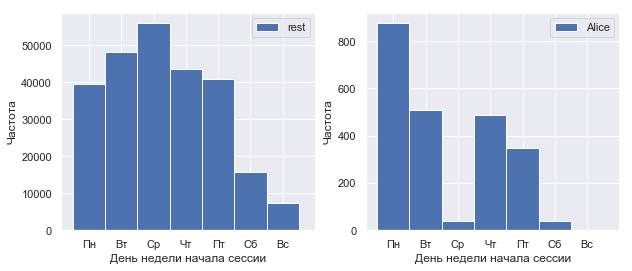

In [405]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
for idx, (user, sub_df) in  enumerate(pd.groupby(new_train_df, 'target')): 
    plt.subplot(1, 2, idx+1)
    plt.hist(sub_df ['day_of_week'], bins = np.arange(-0.5,7.5,1))
    plt.xticks(range(8), [u'Пн', u'Вт', u'Ср', u'Чт', u'Пт', u'Сб', u'Вс'])
    plt.xlabel(u'День недели начала сессии')
    plt.ylabel(u'Частота')
    plt.legend ([target_dic[user]])
    plt.grid(True)

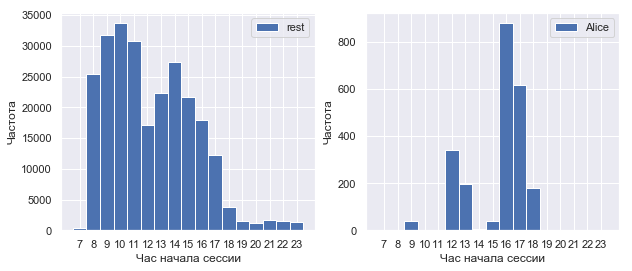

In [408]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
for idx, (user, sub_df) in  enumerate(pd.groupby(new_train_df, 'target')): 
    plt.subplot(1, 2, idx+1)
    plt.hist(sub_df ['start_hour'], bins = np.arange(6.5,24.5,1))
    plt.xlabel(u'Час начала сессии')
    plt.ylabel(u'Частота')
    plt.xticks(range(7,24,1))
    plt.legend ([target_dic[user]])
    plt.grid(True)

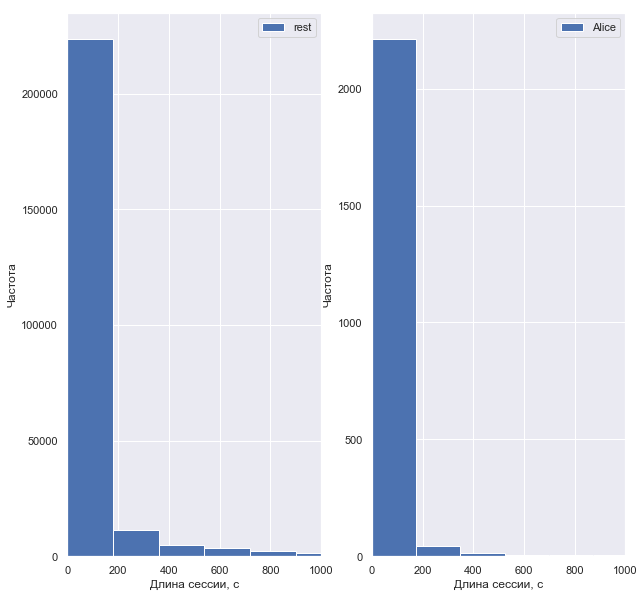

In [411]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
for idx, (user, sub_df) in  enumerate(pd.groupby(new_train_df, 'target')): 
    plt.subplot(1, 2, idx+1)
    plt.hist(sub_df ['session_timespan'])
    plt.xlabel(u'Длина сессии, c')
    plt.ylabel(u'Частота')
    plt.xlim(0,1000)
    plt.legend ([target_dic[user]])
    plt.grid(True)

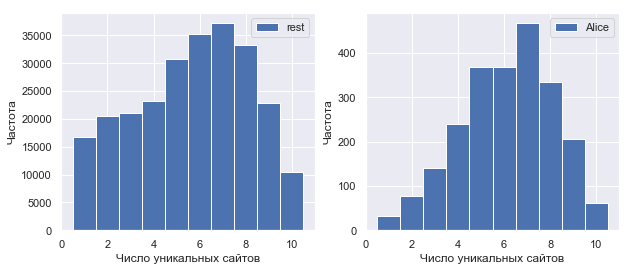

In [413]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
for idx, (user, sub_df) in  enumerate(pd.groupby(new_train_df, 'target')): 
    plt.subplot(1, 2, idx+1)
    plt.hist(sub_df ['#unique_sites'], bins = np.arange(0.5,11.5,1))
    plt.xlabel(u'Число уникальных сайтов')
    plt.ylabel(u'Частота')
    plt.legend ([target_dic[user]])
    plt.grid(True)

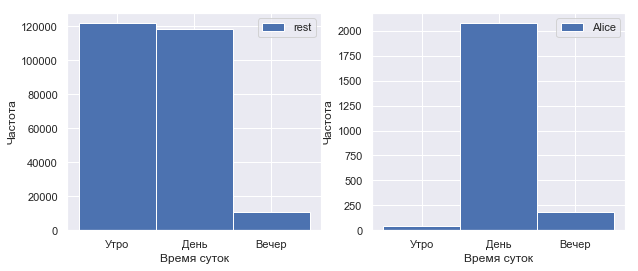

In [402]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
for idx, (user, sub_df) in  enumerate(pd.groupby(new_train_df, 'target')): 
    plt.subplot(1, 2, idx+1)
    plt.hist(sub_df ['time'],  bins =  np.arange(-0.5,3.5,1))
    plt.xlabel(u'Время суток')
    plt.ylabel(u'Частота')
    plt.xticks(range(3), [u'Утро', u'День', u'Вечер'])
    plt.legend ([target_dic[user]])
    plt.grid(True)

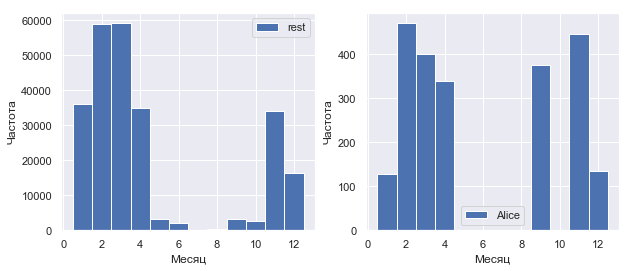

In [465]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
for idx, (user, sub_df) in  enumerate(pd.groupby(new_train_df, 'target')): 
    plt.subplot(1, 2, idx+1)
    plt.hist(sub_df ['month'],bins = np.arange(0.5,13.5,1))
    plt.xlabel(u'Месяц')
    plt.ylabel(u'Частота')
    plt.legend ([target_dic[user]])
    plt.grid(True)

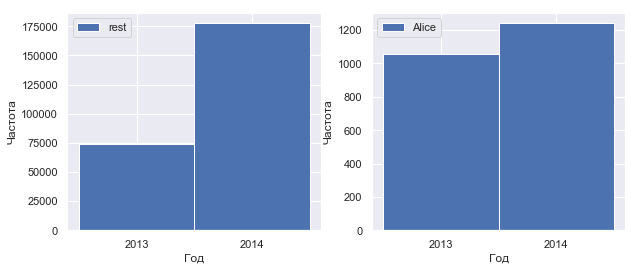

In [478]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
for idx, (user, sub_df) in  enumerate(pd.groupby(new_train_df, 'target')): 
    plt.subplot(1, 2, idx+1)
    plt.hist(sub_df ['year'], bins = np.arange(2012.5,2015.5,1))
    plt.xlabel(u'Год')
    plt.ylabel(u'Частота')
    plt.xticks(range(2013,2015))
    plt.legend ([target_dic[user]])
    plt.grid(True)

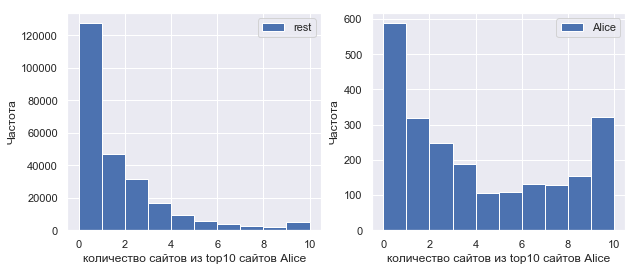

In [416]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
for idx, (user, sub_df) in  enumerate(pd.groupby(new_train_df, 'target')): 
    plt.subplot(1, 2, idx+1)
    plt.hist(sub_df ['top10_Alice_freq'])
    plt.xlabel(u'количество сайтов из top10 сайтов Alice')
    plt.ylabel(u'Частота')
    plt.legend ([target_dic[user]])
    plt.grid(True)

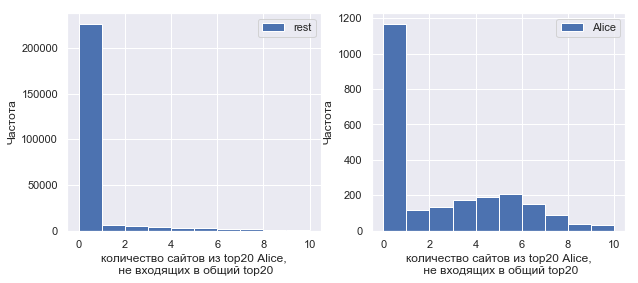

In [415]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
for idx, (user, sub_df) in  enumerate(pd.groupby(new_train_df, 'target')): 
    plt.subplot(1, 2, idx+1)
    plt.hist(sub_df ['top20_onlyAlice_freq'])
    plt.xlabel(u'количество сайтов из top20 Alice,\n не входящих в общий top20')
    plt.ylabel(u'Частота')
    plt.legend ([target_dic[user]])
    plt.grid(True)

Да, эти признаки имеет смысл учитывать.
Категориальные признаки обработаем OneHotEncoder, вещественные - масштабируем.

In [53]:
categorical_cols = ['day_of_week','start_hour','time','month','year']
num_cols = ['session_timespan','#unique_sites', 'top10_Alice_freq', 'top20_onlyAlice_freq']

In [54]:

from sklearn.preprocessing import StandardScaler,OneHotEncoder

In [55]:
encoder = OneHotEncoder()
X_train_test_cat_oh = encoder.fit_transform(new_train_test_df[categorical_cols])

In [56]:
X_train_test_num = StandardScaler().fit_transform(new_train_test_df[num_cols])

In [57]:
newXtrain = hstack((X_train_test_cat_oh[: train_df.shape[0], :],X_train_test_num[: train_df.shape[0], :] ))
newXtest = hstack((X_train_test_cat_oh[ train_df.shape[0] :, :],X_train_test_num[train_df.shape[0] :, :] ))

In [58]:
newX_train_sparse = hstack((train_test_sparse[:train_df.shape[0], :] ,newXtrain ))
newX_test_sparse = hstack((train_test_sparse[train_df.shape[0]:, :] , newXtest))

In [59]:
new_sgd_logit = SGDClassifier(loss = 'log', n_jobs = -1, random_state =17)
new_sgd_logit.fit(newX_train_sparse ,y)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=-1, penalty='l2',
       power_t=0.5, random_state=17, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [484]:
write_to_submission_file(new_sgd_logit.predict_proba(newX_test_sparse) [:,1], 'submission11.csv') #kaggle - 0.939

Добавление признаков улучшило результат. 
А теперь попробуем Blending.
Идеи для реализации взяты отсюда:
https://nbviewer.jupyter.org/github/Yorko/mlcourse_open/blob/master/jupyter_russian/tutorials/tutorial_ensemble_methods_qovaxx.ipynb

In [60]:
#снова делим тренировочную выборку на train и valid
Xt,yt = newX_train_sparse.tocsr()[:train_share, :],y[:train_share]
Xv,yv = newX_train_sparse.tocsr()[train_share:, :],y[train_share:]

Попробуем взять 4 алгоритма.

In [61]:
#в качестве одного из алгоритмов возьмем baseline
new_sgd_logit.fit(Xt,yt)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=-1, penalty='l2',
       power_t=0.5, random_state=17, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [116]:
new_sgd_logit_pred = new_sgd_logit.predict_proba(Xv) [:,1]
round(roc_auc_score( yv, new_sgd_logit_pred),3)

0.977

Добавим 2 алгоритма, основанных на грдиентном бустинге.
Бустинг с параметрами по умолчанию дает не очень большую точность, используем два других.

In [66]:
from sklearn.ensemble import GradientBoostingClassifier
from scipy import stats

In [67]:
gb_def =GradientBoostingClassifier(random_state=17)

In [516]:
%%time
gb_def.fit(Xt,yt)

Wall time: 13min 8s


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=17,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [518]:
round(roc_auc_score( yv, gb_def.predict_proba(Xv) [:,1]),3)

0.947

In [68]:
gb1 =GradientBoostingClassifier(n_estimators = 200, max_depth = 5, random_state=17)

In [69]:
%%time
gb1.fit(Xt,yt)


Wall time: 17min 42s


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              n_iter_no_change=None, presort='auto', random_state=17,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [115]:
gb1_pred = gb1.predict_proba(Xv) [:,1]
round(roc_auc_score( yv, gb1_pred),3)

0.97

In [131]:
%%time
gb2 =GradientBoostingClassifier(n_estimators = 50, max_depth = 8, random_state=17) 
gb2.fit(Xt,yt)

Wall time: 4min 52s


In [132]:
gb2_pred = gb2.predict_proba(Xv) [:,1]
round(roc_auc_score( yv,gb2_pred ),3)

0.955

Пробуем еще 1 SGDClassifier, не смотрите на название, это артефакт, от baseline отличается способом регуляризации - 'elasticnet'  и параметром alpha.

In [106]:
%%time
sgd_svm = SGDClassifier( alpha = 0.000008, loss = 'log', penalty = 'elasticnet', n_jobs = -1, random_state =17)
sgd_svm.fit(Xt,yt)

Wall time: 370 ms


In [107]:
sgd_svm_pred = sgd_el.predict_proba(Xv) [:,1]
round(roc_auc_score( yv, sgd_el_pred ),3)

0.984

In [133]:
predictions = list(zip(new_sgd_logit_pred, gb1_pred, gb2_pred,sgd_svm_pred))

Проверяем корреляцию предсказаний. Коррелируют не очень хорошо, берем все алгоритмы в работу.

In [134]:
classifiers_predictions = pd.DataFrame(data = predictions, columns = ['new_sgd_logit','gb1','gb2','sgd_svm'])
classifiers_predictions.corr()

,new_sgd_logit,gb1,gb2,sgd_svm
new_sgd_logit,1.000000,0.661634,0.617827,0.838049
gb1,0.661634,1.000000,0.818783,0.685662
gb2,0.617827,0.818783,1.000000,0.642715
sgd_svm,0.838049,0.685662,0.642715,1.000000


In [135]:
%%time
Xt_part1, Xt_part2,\
    yt_part1, yt_part2 = train_test_split(Xt, yt, test_size=0.2, random_state=17)
meta_features_part2 = np.zeros((Xt_part2.shape[0], 4))
meta_features_test = np.zeros((Xv.shape[0], 4))


for index, basic_algorithm in enumerate([new_sgd_logit, gb1, gb2,sgd_svm]):
            basic_algorithm.fit(Xt_part1, yt_part1)

            part2_predictions = basic_algorithm.predict_proba(Xt_part2)[:, 1]
            meta_features_part2[:, index] = part2_predictions

            test_predictions = basic_algorithm.predict_proba(Xv)[:, 1]
            meta_features_test[:, index] = test_predictions

Wall time: 16min 56s


In [165]:
%%time
meta_algorithm = LogisticRegression(C=1.1, multi_class='ovr', n_jobs=-1, random_state=17,class_weight = 'balanced')
meta_algorithm.fit(meta_features_part2,yt_part2)


Wall time: 59.8 ms


In [167]:
meta_algorithm_pred = meta_algorithm.predict_proba( meta_features_test) [:,1]
round(roc_auc_score( yv, meta_algorithm_pred),5)

0.98398

In [168]:
%%time
#logit_c_values1 = np.linspace(1.1, 1.7, 7)

logit_grid_searcher_new = LogisticRegressionCV(np.linspace(0.01, 0.04, 6), multi_class='ovr' ,scoring = 'roc_auc', class_weight = 'balanced',cv = cv_search, n_jobs=-1, random_state=17 )
logit_grid_searcher_new.fit(meta_features_part2,yt_part2)

Wall time: 1.41 s


In [169]:

sorted(list(zip(logit_grid_searcher_new.Cs_,np.mean(logit_grid_searcher_new.scores_[1], axis = 0))), key = itemgetter(1)) [::-1] 

[(0.022, 0.9839473696666762),
 (0.028000000000000004, 0.9839464821599311),
 (0.034, 0.9839423404617875),
 (0.04, 0.9839414529550425),
 (0.016, 0.9839370154213172),
 (0.01, 0.9839231111489782)]

In [170]:
meta_algorithm_tuned = LogisticRegression(C=0.022, multi_class='ovr' , n_jobs=-1, random_state=17,class_weight = 'balanced')
meta_algorithm_tuned.fit(meta_features_part2,yt_part2)
meta_algorithm_tuned_pred = meta_algorithm_tuned.predict_proba( meta_features_test) [:,1]
round(roc_auc_score( yv, meta_algorithm_tuned_pred),4)

0.9843

In [171]:
%%time
Xtrain_part1, Xtrain_part2,\
    ytrain_part1, ytrain_part2 = train_test_split(newX_train_sparse, y, test_size=0.2, random_state=17)
meta_features_part2 = np.zeros((Xtrain_part2.shape[0], 4))
meta_features_test = np.zeros((newX_test_sparse.shape[0], 4))


for index, basic_algorithm in enumerate([new_sgd_logit, gb1, gb2,sgd_svm]):
            basic_algorithm.fit(Xtrain_part1, ytrain_part1)

            part2_predictions = basic_algorithm.predict_proba(Xtrain_part2)[:, 1]
            meta_features_part2[:, index] = part2_predictions

            test_predictions = basic_algorithm.predict_proba(newX_test_sparse)[:, 1]
            meta_features_test[:, index] = test_predictions

Wall time: 27min 26s


In [172]:
%%time


logit_grid_searcher_new_test = LogisticRegressionCV(np.linspace(0.01, 0.04, 6), multi_class='ovr' ,scoring = 'roc_auc', class_weight = 'balanced',cv = cv_search, n_jobs=-1, random_state=17 )
logit_grid_searcher_new_test.fit(meta_features_part2,ytrain_part2)

Wall time: 5.52 s


In [173]:
sorted(list(zip(logit_grid_searcher_new_test.Cs_,np.mean(logit_grid_searcher_new_test.scores_[1], axis = 0))), key = itemgetter(1)) [::-1] 

[(0.016, 0.9894205292455301),
 (0.01, 0.9894193882163718),
 (0.022, 0.9894131755834358),
 (0.028000000000000004, 0.9894099069732673),
 (0.034, 0.9894025476248917),
 (0.04, 0.9893951778516672)]

In [175]:
meta_algorithm_test_tuned = LogisticRegression(C=0.016, multi_class='ovr' , n_jobs=-1, random_state=17,class_weight = 'balanced')
meta_algorithm_test_tuned.fit(meta_features_part2,ytrain_part2)
meta_algorithm_test_tuned_pred = meta_algorithm_test_tuned.predict_proba( meta_features_test) [:,1]


In [176]:
write_to_submission_file(meta_algorithm_test_tuned_pred, 'submission13.csv') # kaggle - 0.940

In [177]:
meta_algorithm_test_2 = LogisticRegression(C=1.1, multi_class='ovr' , n_jobs=-1, random_state=17,class_weight = 'balanced')
meta_algorithm_test_2.fit(meta_features_part2,ytrain_part2)
meta_algorithm_test_2_pred = meta_algorithm_test_2.predict_proba( meta_features_test) [:,1]
write_to_submission_file(meta_algorithm_test_2_pred, 'submission14.csv') # kaggle - 0.940, на 0.0001 лучше


Настроенный мета-алгоритм - Логистическая регрессия (С=0.016), даёт даже чуть меньшую точность, чем с C=1.1.
Blending улучшил точность baseline-алгоритма всего на 0.001
Но зато мы обнаружили, что смена способа регуляризации baseline-алгоритма на 'elasticnet' + настройка параметра регуляризации увеличивает его точность на отложенной выборке. Проверяем на kaggle.

In [178]:
sgd_svm.fit(newX_train_sparse,y)
write_to_submission_file(sgd_svm.predict_proba(newX_test_sparse) [:,1], 'submission15.csv') # kaggle - 0.945, входим в топ-50

Итак, мы получили точность 0.945 с помощью добавления новых признаков и настройки параметров baseline модели. Blending оказался неэффективен.
Можно двигаться дальше, например, использоватьTfIdfVectorizer, но мне пока достаточно.